## 课程论文

请务必交到exer8文件夹下，**谢绝交到master下**

+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  宁越
+ 学号  0164964

## 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif']=['STFangsong']
plt.rcParams['axes.unicode_minus']=False

In [28]:
sentinels = {'a13': [' '], 'a14': [' ']}
df = pd.read_csv('/Users/ningyue/Documents/Python/CEPS.csv',encoding='gb2312', na_values=sentinels)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
data=df.sample(n=1000)
mean_height_sample=data['a13'].mean()
mean_weight_sample=data['a14'].mean()
print('第一次抽取的样本的身高均值为：%.2f厘米'%mean_height_sample)
print('第一次抽取的样本的体重均值为：%.2f斤'%mean_weight_sample)

第一次抽取的样本的身高均值为：161.66厘米
第一次抽取的样本的体重均值为：99.61斤


In [30]:
i=0
mean_height={}
mean_weight={}

while i<30:
    new_data=df.sample(n=1000)   
    mean_height_new=new_data['a13'].mean() 
    mean_height[i+1]=mean_height_new
    mean_weight_new=new_data['a14'].mean()    
    mean_weight[i+1]=mean_weight_new
    i=i+1
    
print('目前的身高：\n')    
print(mean_height)
print('\n目前的体重：\n')
print(mean_weight)

目前的身高：

{1: 161.38986556359876, 2: 161.2902564102564, 3: 161.42315573770492, 4: 161.6734902763562, 5: 161.52169421487602, 6: 161.71044467425025, 7: 161.5786228160329, 8: 161.2958762886598, 9: 160.64389233954452, 10: 161.66597510373444, 11: 161.73395445134577, 12: 161.77272727272728, 13: 161.78734439834025, 14: 161.7456049638056, 15: 162.22666666666666, 16: 161.6308169596691, 17: 161.44788441692467, 18: 161.4969199178645, 19: 161.57727737973389, 20: 161.70901639344262, 21: 161.56441717791412, 22: 161.65781409601635, 23: 162.1081359423275, 24: 161.87668393782383, 25: 161.9740932642487, 26: 162.1633714880333, 27: 162.00308324768756, 28: 161.68589083419155, 29: 161.64028776978418, 30: 162.2218782249742}

目前的体重：

{1: 98.71960569550932, 2: 99.04362050163577, 3: 98.80561555075595, 4: 100.32181425485962, 5: 100.17864923747277, 6: 99.51287553648069, 7: 98.60457516339869, 8: 98.46026490066225, 9: 98.71317829457364, 10: 100.74454148471615, 11: 98.77049180327869, 12: 99.59036144578313, 13: 99.9287

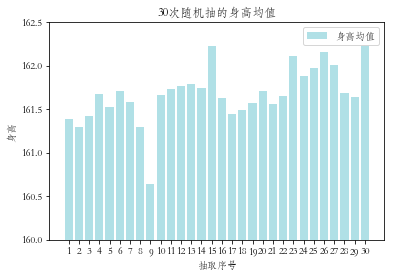

In [31]:
ind = np.arange(len(mean_height.values())) 
width = 0.8

fig, ax = plt.subplots()
rects1 = ax.bar(ind, mean_height.values(), width, 
                color='#B0E0E6', label='身高均值')

ax.set_xlabel('抽取序号')
ax.set_ylabel('身高')
ax.set_title('30次随机抽的身高均值')
ax.set_xticks(ind)
ax.set_xticklabels(mean_height.keys())
ax.legend()
ax.set_ylim(160,162.5)

plt.show()

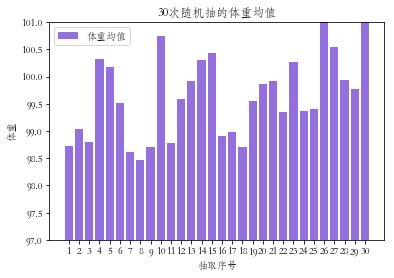

In [32]:
ind = np.arange(len(mean_weight.values()))
width = 0.8 

fig, ax = plt.subplots()
rects1 = ax.bar(ind, mean_weight.values(), width, 
                color='#9370DB', label='体重均值')

ax.set_xlabel('抽取序号')
ax.set_ylabel('体重')
ax.set_title('30次随机抽的体重均值')
ax.set_xticks(ind)
ax.set_xticklabels(mean_height.keys())
ax.legend()
ax.set_ylim(97,101)

plt.show()

In [33]:
mean_mean_height=[]
for i in mean_height.values():
    mean_mean_height.append(i)
    
mean_mean_weight=[]
for i in mean_weight.values():
    mean_mean_weight.append(i)

average={'mean_mean_height':mean_mean_height,
              'mean_mean_weight':mean_mean_weight,
              }
frame = pd.DataFrame(average,index=mean_height.keys())
print('身高和体重的样本均值的均值如下：\n')
print(frame.mean())
print('\n身高和体重的标准误如下：\n')
print(frame.std())

身高和体重的样本均值的均值如下：

mean_mean_height    161.673905
mean_mean_weight     99.660631
dtype: float64

身高和体重的标准误如下：

mean_mean_height    0.318482
mean_mean_weight    0.828715
dtype: float64


## 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码

+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif']=['STFangsong']
plt.rcParams['axes.unicode_minus']=False

+ 挑选成绩作为因变量，
+ 父母双方的受教育程度，家庭经济条件，家中书的数量和一周中花在作业上面的时间作为自变量

In [35]:
sentinels = {'c12': [' '],'b06': [' '], 'b07': [' '], 'b09': [' '], 'b12': [' '], 'b14a1': [' '], 'b14a2': [' '], 'b14b1': [' '], 'b14b2': [' ']}
df1 = pd.read_csv('/Users/ningyue/Documents/Python/CEPS.csv',encoding='gb2312', na_values=sentinels)
df2 =df1.sample(n=1000)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
data=pd.DataFrame({'x1':df2.b06+df2.b07,
                              'x2':df2.b09,
                              'x3':df2.b12,
                              'x4':df2.b14a1+df2.b14a2/60+df2.b14b1+df2.b14b2/60,
                              'y':df2.c12})
data=data.dropna(axis=0,how='any')
data

,x1,x2,x3,x4,y
9347,8.0,3.0,3.0,5.666667,4.0
10705,6.0,3.0,4.0,8.333333,4.0
5538,12.0,3.0,5.0,6.500000,3.0
2445,9.0,2.0,1.0,0.000000,3.0
318,9.0,3.0,1.0,7.500000,4.0
9357,6.0,4.0,3.0,5.500000,1.0
10248,5.0,2.0,3.0,13.500000,4.0
18555,6.0,4.0,4.0,4.000000,3.0
16871,6.0,3.0,3.0,8.166667,4.0
15284,8.0,4.0,4.0,4.000000,3.0


In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [38]:
model_x= ['x1','x2','x3','x4']#构建自变量
X = data.loc[ :,model_x].values
y=data['y'].values#构建因变量
X_model = sm.add_constant(X)#加入截距

In [39]:
model = sm.OLS(y, X) #在反应变量和回归变量上使用 OLS() 函数
results = model.fit()#拟合ols回归
print(results.params)# 再调取计算出的回归系数

[0.0391045  0.62420784 0.18718692 0.03756526]


In [40]:
print(results.summary())#获取全部摘要

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 30 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:48:38   Log-Likelihood:                -1415.3
No. Observations:                 890   AIC:                             2839.
Df Residuals:                     886   BIC:                             2858.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0391      0.012      3.216      0.0

###### 回归结果：

    模型拟合指标:
        当R²=SSR/SST，是拟合优度，所以R²的数值越接近1，说明回归直线对观测值的拟合程度越好，
        此时R²的说明模型的拟合效果较好。
        此时R²=0.869，说明在成绩的变异中，能被父母双方的受教育程度，家庭经济条件，家中书的数量
        和一周中花在作业上面的时间的多元回归方程所解释的比例是88%。 
        
      模型的显著性检验结果(表中Prob值):
        上图中的P<0.05，说明该模型的结果是统计显著的。
    
      变量的系数：
        x1的系数为0.0391，
        x2的系数为0.6242，
        x3的系数为0.1872，
        x4的系数为0.0376，
        这4个自变量均与因变量呈正向相关。
        
     各系数的显著性检验结果：
        各变量的t统计量均较大，且p值<0.05，说明这4个自变量都是统计显著的，也就是说父母双方的受教育程度，
        家庭经济条件，家中书的数量和一周中花在作业上面的时间都对因变量学习成绩有显著影响的。
    
    对模型结果的解释：
        父母双方的受教育程度，家庭经济条件，家中书的数量和一周中花在作业上面的时间都对因变量学习成绩有关。
        X1为分类变量，代表着父母双方的受教育程度，即父母双方的受教育程度每提升一个水平，则学习成绩提高0.0391个等级
        X2为分类变量，代表着家庭经济条件，即家庭经济条件每提升一个水平，则学习成绩提高0.6242个等级
        X2为分类变量，代表着家中书的数量，即家中数量每增加一个等级，则学习成绩提高0.1872个等级
        X3为一周中花在作业上面的时间，即一周中花在作业上面的时间一小时，则学习成绩提高0.0376个等级
